# Credit Default Prediction

## Import Library

In [ ]:
!pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Finpro kumpul Suci/Credit Default Prediction Dataset.csv')
df

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


## Data Understanding

### Data Dictionaries



* Id : Serial Number
* Income : debtor's income
* age : age of debtor
* experience : length of employment (in years)
* married : marital status
* house_ownership : residential ownership status
* car_ownership : car ownership status
* profession : job type
* city : city of residence
* state : state of domicile
* current_job_years : length of employment in current job
* current_house_years : length of time the domicile has been occupied
* risk_flag : whether or not the customer is at risk of delinquency (this is the target)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Missing Value and Duplicates Check

In [ ]:
# number of missing values per column
df.isna().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

In [ ]:
# number of duplicated data
df.duplicated().sum()

0

* Data contains 12 column with 225000 rows
* Data has no missing value and there is no duplicated
* All dtypes seem OK (appropriate), given the corresponding column name

## Baseline Model

In [ ]:
# frequency check
df['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64

In [ ]:
# percentage frequency check
df['risk_flag'].value_counts(normalize=True)*100

0    87.7
1    12.3
Name: risk_flag, dtype: float64

In [ ]:
# drop categorical data and Id column
df12 = df.drop(['Id', 'married', 'house_ownership', 'car_ownership','profession','city','state'], axis=1)
df12

,income,age,experience,current_job_years,current_house_years,risk_flag
0,1303835,23,3,3,13,0
1,7574516,40,10,9,13,0
2,3991815,66,4,4,10,0
3,6256451,41,2,2,12,1
4,5768871,47,11,3,14,1
...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0
251996,2843572,26,10,6,11,0
251997,4522448,46,7,7,12,0
251998,6507128,45,0,0,10,0


### Split the Data

In [ ]:
X = df12.drop('risk_flag', axis=1)
y = df12['risk_flag']

In [ ]:
X.head()

,income,age,experience,current_job_years,current_house_years
0,1303835,23,3,3,13
1,7574516,40,10,9,13
2,3991815,66,4,4,10
3,6256451,41,2,2,12
4,5768871,47,11,3,14


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size = 0.20,
                                                random_state = 42)

In [ ]:
X_train.head()

,income,age,experience,current_job_years,current_house_years
200471,9121364,70,18,3,11
92611,2636544,39,0,0,11
86397,1010539,39,9,4,13
110500,3897430,21,2,2,12
185133,9470213,41,5,5,13


### Modelling with Numercial Data Only

#### Logistic Regression

In [ ]:
# train
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# predict
y_pred_reg = logreg.predict(X_test)
y_pred_reg

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluation
print('accuracy score LogReg', accuracy_score(y_test, y_pred_reg))
print('F1 score LogReg', f1_score(y_test, y_pred_reg))
print('recall score LogReg', recall_score(y_test, y_pred_reg))
print('precision score LogReg', precision_score(y_test, y_pred_reg))

accuracy score LogReg 0.8759325396825397
F1 score LogReg 0.0
recall score LogReg 0.0
precision score LogReg 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [ ]:
# train
dt =DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# predict
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# evaluation
print('accuracy score decision tree', accuracy_score(y_test, y_pred_dt))
print('F1 score decision tree', f1_score(y_test, y_pred_dt))
print('recall score decision tree', recall_score(y_test, y_pred_dt))
print('precision score decision tree', precision_score(y_test, y_pred_dt))

accuracy score decision tree 0.8818452380952381
F1 score decision tree 0.5444112921735139
recall score decision tree 0.5690068766991844
precision score decision tree 0.5218539161044294


#### KNN

In [ ]:
# train
knn =KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# predict
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# evaluation
print('accuracy score KNN', accuracy_score(y_test, y_pred_knn))
print('F1 score KNN', f1_score(y_test, y_pred_knn))
print('recall score KNN', recall_score(y_test, y_pred_knn))
print('precision score KNN', precision_score(y_test, y_pred_knn))

accuracy score KNN 0.889702380952381
F1 score KNN 0.5337582823114989
recall score KNN 0.5088757396449705
precision score KNN 0.5611992945326278


#### Random Forest

In [ ]:
# train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# predict
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# evaluation
print('accuracy score Random Forest', accuracy_score(y_test, y_pred_rf))
print('F1 score Random Forest', f1_score(y_test, y_pred_rf))
print('recall score Random Forest', recall_score(y_test, y_pred_rf))
print('precision score Random Forest', precision_score(y_test, y_pred_rf))

accuracy score Random Forest 0.8960912698412699
F1 score Random Forest 0.5642007156528253
recall score Random Forest 0.5421397729090037
precision score Random Forest 0.5881332408049965


#### Gaussian Naive Bayes

In [ ]:
# train
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# predict
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# evaluation
print('accuracy score Gaussian Naive Bayes', accuracy_score(y_test, y_pred_gnb))
print('F1 score Gaussian Naive Bayes', f1_score(y_test, y_pred_gnb))
print('recall score Gaussian Naive Bayes', recall_score(y_test, y_pred_gnb))
print('precision score Gaussian Naive Bayes', precision_score(y_test, y_pred_gnb))

accuracy score Gaussian Naive Bayes 0.8759325396825397
F1 score Gaussian Naive Bayes 0.0
recall score Gaussian Naive Bayes 0.0
precision score Gaussian Naive Bayes 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Gradient Boosted Tree

In [ ]:
# train
gbt = GradientBoostingClassifier()
gbt.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# predict
y_pred_gbt = gbt.predict(X_test)
y_pred_gbt

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# evaluation
print('accuracy score Gaussian Gradient Boosted Tree', accuracy_score(y_test, y_pred_gbt))
print('F1 score Gaussian Gradient Boosted Tree', f1_score(y_test, y_pred_gbt))
print('recall score Gaussian Gradient Boosted Trees', recall_score(y_test, y_pred_gbt))
print('precision score Gaussian Gradient Boosted Tree', precision_score(y_test, y_pred_gbt))

accuracy score Gaussian Gradient Boosted Tree 0.8759920634920635
F1 score Gaussian Gradient Boosted Tree 0.001916320664324497
recall score Gaussian Gradient Boosted Trees 0.0009595394210778827
precision score Gaussian Gradient Boosted Tree 0.6666666666666666


Based on the data in the baseline model above, the best model is Random Forest with the highest evaluation on accuracy of 0.905. But because this data is imbalance, it is not possible for us to use accuracy as the evaluation matrix. Later we will check again which is the best model that we can use to predict this dataset.

## EDA

### Statistical Summary

In [ ]:
# group column names based on type

categoricals = ['house_ownership','car_ownership','profession','city','state']

numericals = ['income', 'age', 'experience', 'current_job_years','current_house_years','risk_flag']

In [ ]:
# numerical statistical sumary
df[numericals].describe()

,income,age,experience,current_job_years,current_house_years,risk_flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Observation:
* Overall, the minimum and maximum values make sense for each column
* `risk_flag` column is boolean/binary column since the value is 0 or 1, no need to conclude its simmetricity. As this can be a target variable for modelling, we will inspect the balance-level later.
* Mean ~ 50% (Median) in all column, indicating somewhat a symmetrical distribution (but for more details, we will look at the univariate analysis.)

In [ ]:
# describe method on categorical data
df[categoricals].describe()

,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000
unique,3,2,51,317,29
top,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,231898,176000,5957,1259,28400


Observation:
* `professions`, `cities` and `states` have so many unique values that it will be difficult to infer data from these columns.

In [ ]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of house_ownership column
rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64 

Value counts of car_ownership column
no     176000
yes     76000
Name: car_ownership, dtype: int64 

Value counts of profession column
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer 

In [ ]:
class_counts = df['risk_flag'].value_counts()
print(class_counts)

0    221004
1     30996
Name: risk_flag, dtype: int64


imbalance data

### Statistical Testing

In [ ]:
predictor_data = df[['income','age','experience']]
predictor_data.head()

,income,age,experience
0,1303835,23,3
1,7574516,40,10
2,3991815,66,4
3,6256451,41,2
4,5768871,47,11


In [ ]:
target_data = df[['risk_flag']]

In [ ]:
import statsmodels.api as sm

# Assuming 'predictor_data' is a Pandas Series or DataFrame containing your continuous predictor variable
# Assuming 'target_data' is a Pandas Series or DataFrame containing your categorical target variable


# Add a constant column to the predictor data
predictor_data = sm.add_constant(predictor_data)

# Fit the logistic regression model
logit_model = sm.Logit(target_data, predictor_data)
logit_result = logit_model.fit()

# Print the summary of the logistic regression model
print(logit_result.summary())


Optimization terminated successfully.
         Current function value: 0.372021
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              risk_flag   No. Observations:               252000
Model:                          Logit   Df Residuals:                   251996
Method:                           MLE   Df Model:                            3
Date:                Thu, 27 Jul 2023   Pseudo R-squ.:                0.002251
Time:                        03:57:59   Log-Likelihood:                -93749.
converged:                       True   LL-Null:                       -93961.
Covariance Type:            nonrobust   LLR p-value:                 2.378e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5831      0.023    -67.680      0.000      -1.629      -1.537
income     -3.068e-09   2.11e

From the statistical test above for the `age` and `experience` variables have a P value close to 0 or <0.05, meaning that these two variables have a correlation with the target even though we cannot be sure how big the correlation is, while for the `income` variable, the P value is> 0.05, which means that `income` does not correlate with the target `risk_flag` variable.

### Chi-Square Test

married vs risk_flag


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with the predictor and target variables
data_uji = pd.DataFrame({'married': df['married'],
                     'Target': df['risk_flag']})

# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(data_uji['married'], data_uji['Target'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
if p_value < 0.05:
    print('marital status has a significant correlation with risk flag')
else :
    print('marital status has no a significant correlation with risk flag')

Chi-square statistic: 111.89204667099783
p-value: 3.773053705715196e-26
marital status has a significant correlation with risk flag


house_ownership vs risk_flag

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with the predictor and target variables
data_uji = pd.DataFrame({'house_ownership': df['house_ownership'],
                     'Target': df['risk_flag']})

# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(data_uji['house_ownership'], data_uji['Target'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
if p_value < 0.05:
    print('house_ownership has a significant correlation with risk flag')
else :
    print('house_ownership has no a significant correlation with risk flag')

Chi-square statistic: 182.98924138871385
p-value: 1.8381930028370595e-40
house_ownership has a significant correlation with risk flag


car_ownership vs risk_flag

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a DataFrame with the predictor and target variables
data_uji = pd.DataFrame({'car_ownership': df['car_ownership'],
                     'Target': df['risk_flag']})

# Create a contingency table of observed frequencies
contingency_table = pd.crosstab(data_uji['car_ownership'], data_uji['Target'])

# Perform the chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2)
print("p-value:", p_value)
if p_value < 0.05:
    print('car_ownership has a significant correlation with risk flag')
else :
    print('car_ownership has no a significant correlation with risk flag')

Chi-square statistic: 145.42374419378916
p-value: 1.7350853850183746e-33
car_ownership has a significant correlation with risk flag


Based on the chi square test above, we can conclude that `married`, `house_ownership`, and `car_ownership` have a fairly strong correlation with the target `risk_flag` variable.

### Univariate Analysis

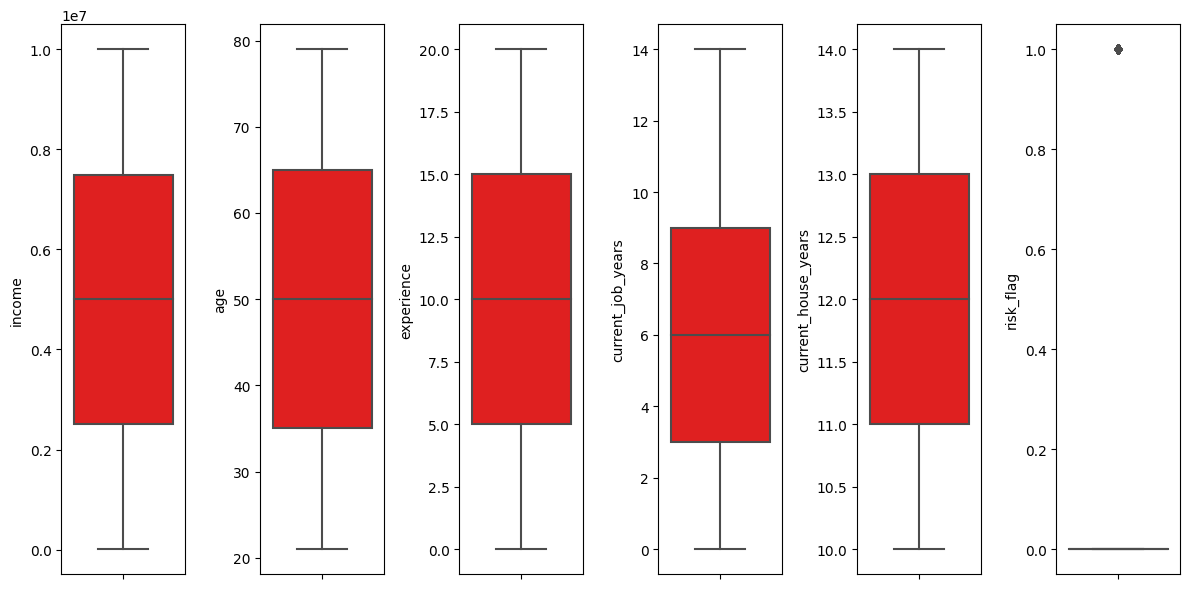

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

we can see, that risk-flag is the only column that has outliers and it reasonable, since it only has 2 unique value ( 0 and 1). So we can say that there are no outliers in this dataset.

### KDE plot for knowing the distribution form

<ipython-input-45-064fb7941452>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[features[i]], color='skyblue')
<ipython-input-45-064fb7941452>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[features[i]], color='skyblue')
<ipython-input-45-064fb7941452>:8: UserWarning: 

`distplot` i

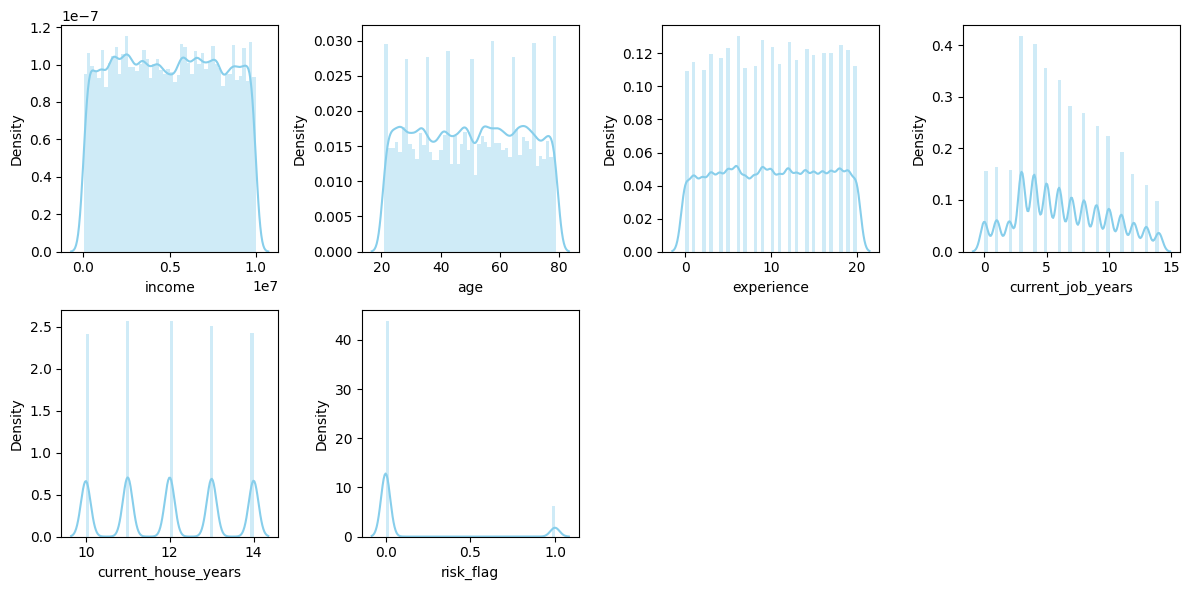

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

somehow, the columns are not simetrical, but not skew either


### Bivariate Analysis

#### Question 1
Which age is the most at risk?

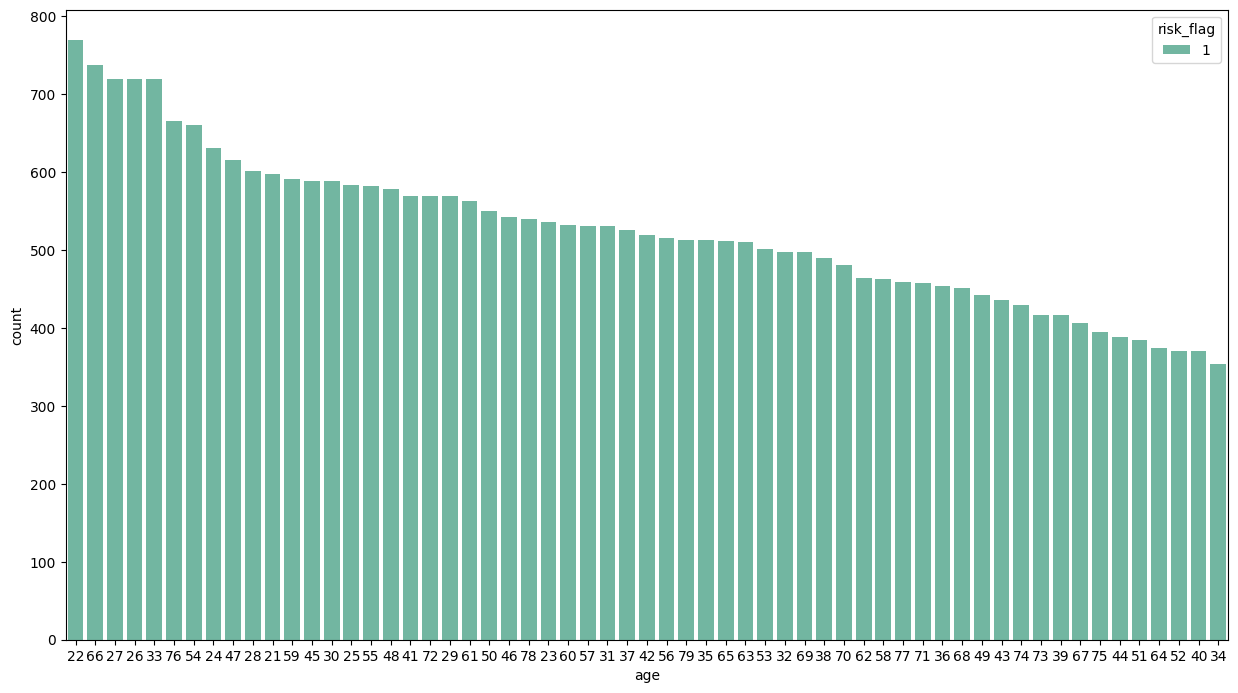

In [ ]:
# Filter data untuk risk flag = 1
filtered_data = df[df['risk_flag'] == 1]

# Hitung frekuensi kemunculan setiap usia
age_counts = filtered_data['age'].value_counts()

# Ambil semua usia dengan frekuensi kemunculan pada sumbu x
all_ages = age_counts.index

# Urutkan usia berdasarkan frekuensi kemunculan secara descending
sorted_ages = sorted(all_ages, key=lambda age: age_counts[age], reverse=True)

plt.figure(figsize=(15, 18))

plt.subplot(2, 1, 1)
sns.countplot(x='age', hue='risk_flag', palette='Set2', data=filtered_data, order=sorted_ages)

plt.show()

**There is no visible risk in certain age groups, which means that any age can be at risk of default.

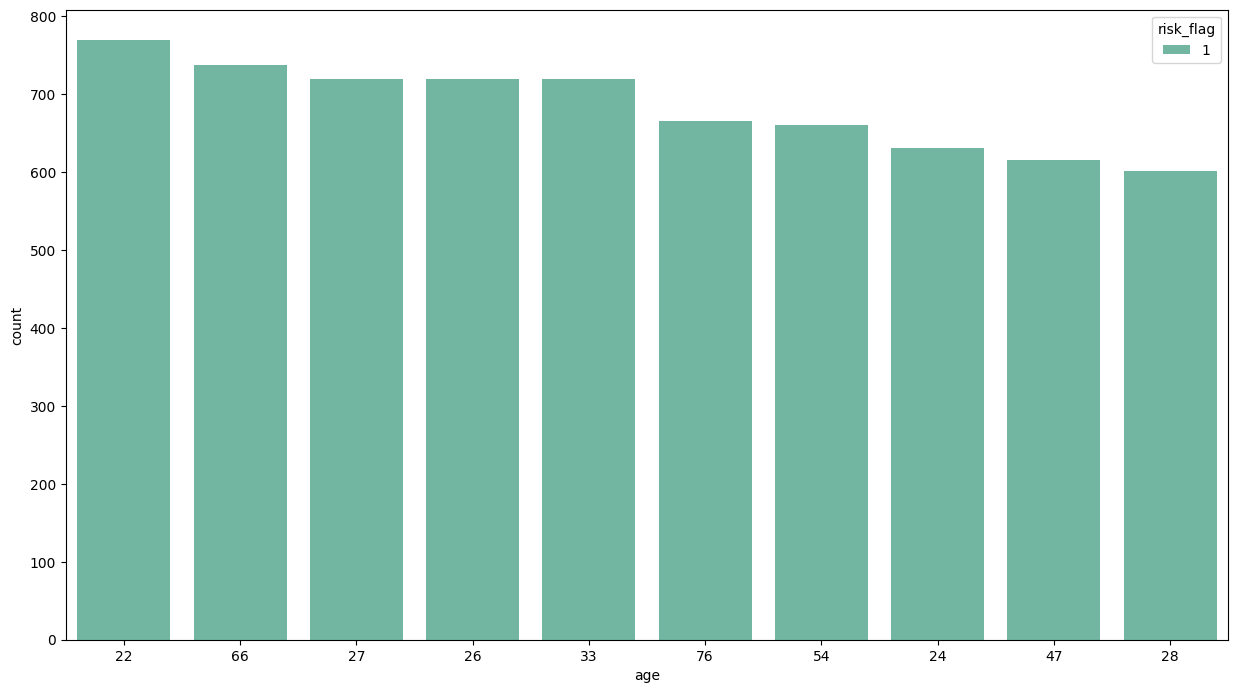

In [ ]:
# Filter data untuk risk flag = 1
filtered_data = df[df['risk_flag'] == 1]

# Hitung frekuensi kemunculan setiap usia
age_counts = filtered_data['age'].value_counts()

# Ambil 10 frekuensi tertinggi
top_10_frequencies = age_counts.head(10)

# Ambil usia yang sesuai dengan 10 frekuensi tertinggi
top_10_ages = top_10_frequencies.index

# Urutkan usia berdasarkan frekuensi kemunculan secara descending
sorted_ages = sorted(top_10_ages, key=lambda age: age_counts[age], reverse=True)

plt.figure(figsize=(15, 18))

plt.subplot(2, 1, 1)
sns.countplot(x='age', hue='risk_flag', palette='Set2', data=filtered_data, order=sorted_ages)

plt.show()

But if we take the 10 ages with the highest risk, we can see that the 20s are more at risk than other ages.

#### Question 2
Based on homeownership status, which is more at risk?

<Axes: xlabel='house_ownership', ylabel='count'>

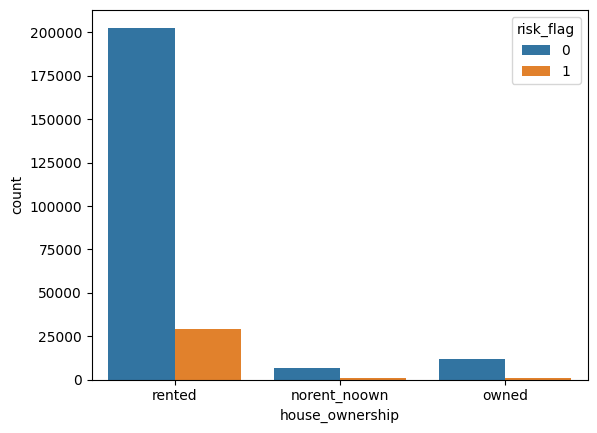

In [ ]:
# research_exp affect admit_status?
sns.countplot(data=df,
            hue='risk_flag',
            x='house_ownership')

people who live in rented houses are more likely to default than people who own their own houses

#### Question 3
Based on carownership status, which is more at risk?

<Axes: xlabel='car_ownership', ylabel='count'>

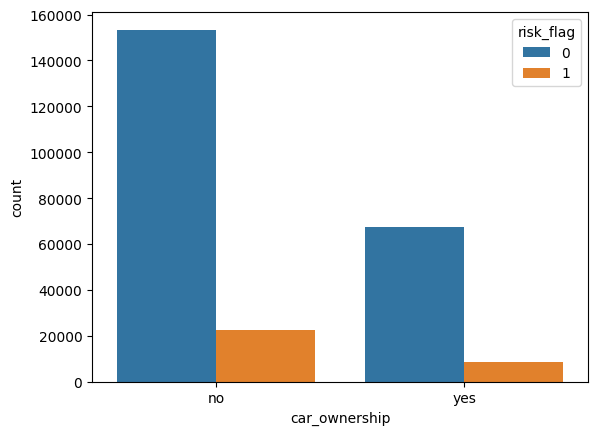

In [ ]:
# research_exp affect admit_status?
sns.countplot(data=df,
            hue='risk_flag',
            x='car_ownership')

people whose car ownership status is no, are more likely to default than people whose car ownership status is yes.

#### Question 4
Based on marital status, which is more at risk?

<Axes: xlabel='married', ylabel='count'>

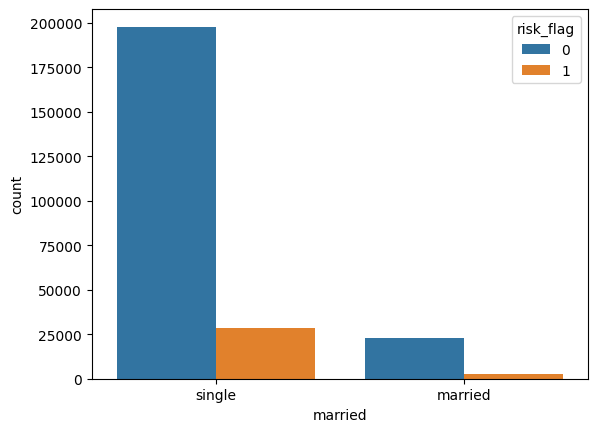

In [ ]:
# research_exp affect admit_status?
sns.countplot(data=df,
            hue='risk_flag',
            x='married')

unmarried people have more defaults than married people

#### Question 5
Does length of employment have any influence on one's credit default?

<Axes: xlabel='experience', ylabel='count'>

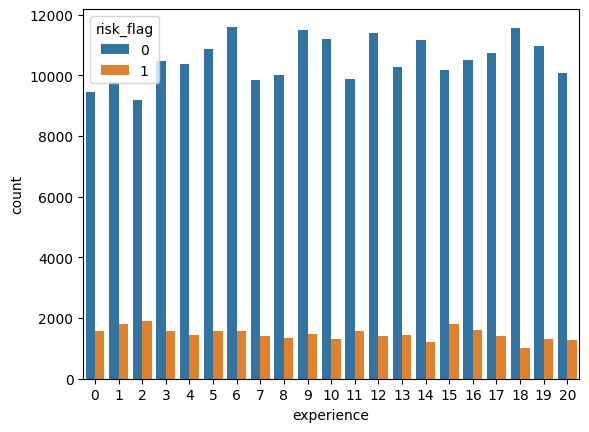

In [ ]:
# research_exp affect admit_status?
sns.countplot(data=df,
            hue='risk_flag',
            x='experience')

no, it does not

<Axes: xlabel='current_job_years', ylabel='count'>

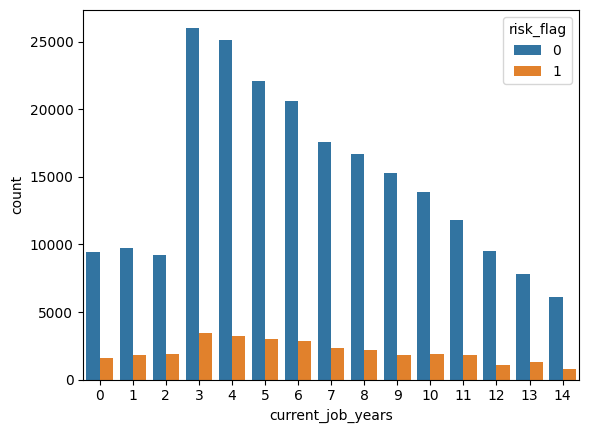

In [ ]:
# research_exp affect admit_status?
sns.countplot(data=df,
            hue='risk_flag',
            x='current_job_years')

risk_flag based on experience and current_job_years does not show any striking data.

In [ ]:
# retrieve risk_flag 1 customer from df
rf1 = df[df['risk_flag']==1]
rf1

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
14,15,9420838,48,6,single,rented,no,Technical_writer,Madurai,Tamil_Nadu,6,10,1
17,18,3666346,56,12,single,rented,no,Politician,Bhusawal,Maharashtra,12,11,1
28,29,8832725,64,5,single,rented,no,Biomedical_Engineer,Pondicherry,Puducherry,5,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251973,251974,1244622,35,15,single,rented,no,Psychologist,Alwar,Rajasthan,3,11,1
251977,251978,1330613,63,19,single,rented,no,Engineer,Purnia[26],Bihar,13,12,1
251981,251982,1796713,47,2,single,rented,no,Technician,Kolhapur,Maharashtra,2,12,1
251982,251983,3182290,52,2,single,rented,no,Drafter,Naihati,West_Bengal,2,10,1


In [ ]:
def plot_top_categories(data, category_column, top_n=10):
    # Menghitung top N kategori
    top_categories = (data.groupby(category_column)
                      .size()
                      .reset_index(name='count')
                      .sort_values('count', ascending=False)
                      .head(top_n)
                     )

    # Membuat plot bar
    plt.figure(figsize=(10, 6))
    plt.bar(top_categories[category_column], top_categories['count'])
    plt.xticks(rotation=45)
    plt.xlabel(category_column)
    plt.ylabel('Count')
    plt.title(f'Top {top_n} {category_column} with the Most Counts')

    # Menambahkan indeks pada masing-masing bar
    for i, value in enumerate(top_categories['count']):
        plt.text(i, value, str(value), ha='center', va='bottom')

    plt.tight_layout()

    # Menampilkan plot
    plt.show()

#### Question 6
What are 10 cities with the most risk_flags ?

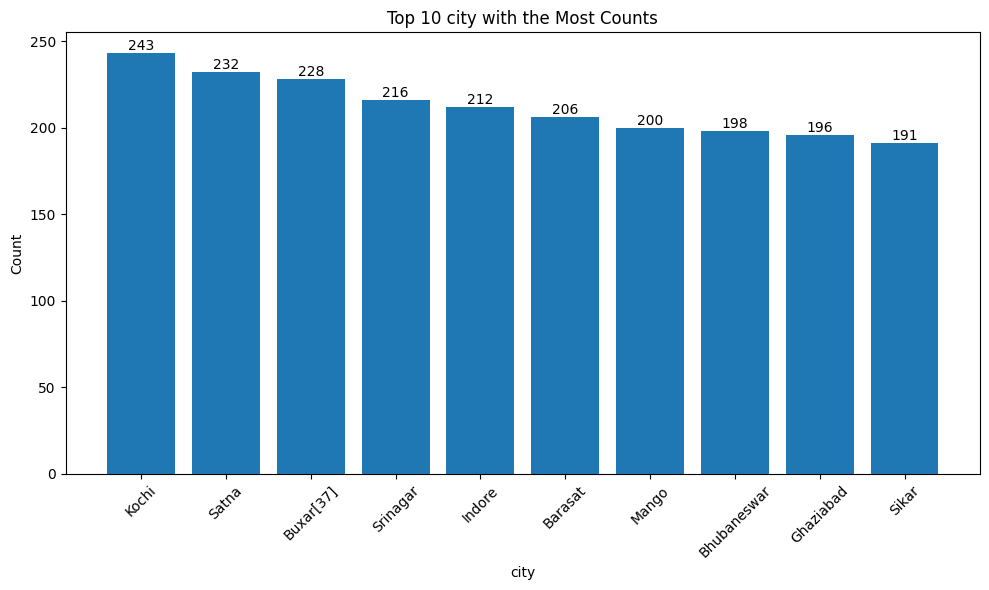

In [ ]:
plot_top_categories(rf1, 'city', top_n=10)

#### Question 7
What are 10 profession with the most risk_flags ?

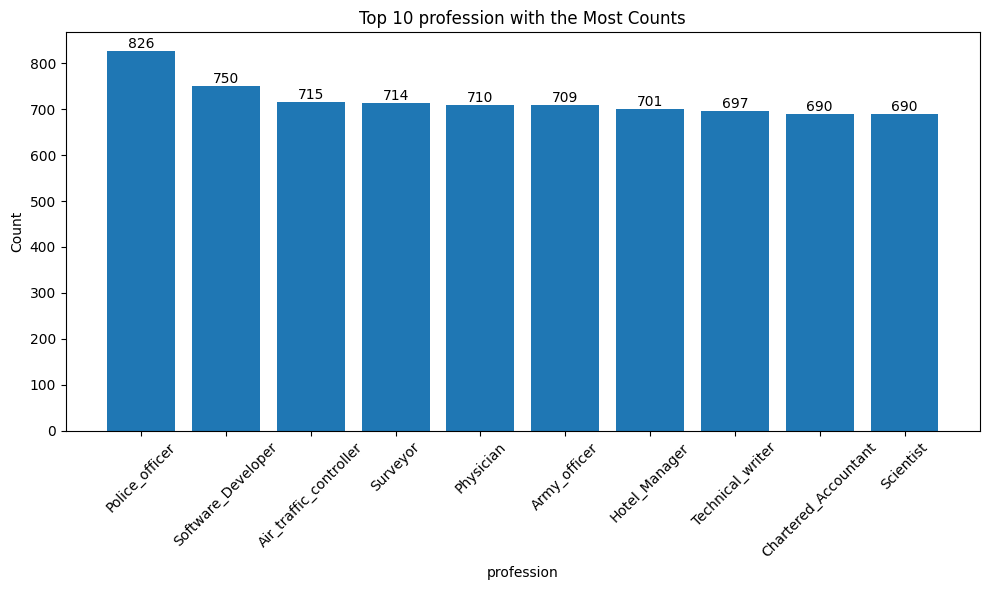

In [ ]:
plot_top_categories(rf1, 'profession', top_n=10)

#### Question 8
What are 10 states with the most risk_flags ?

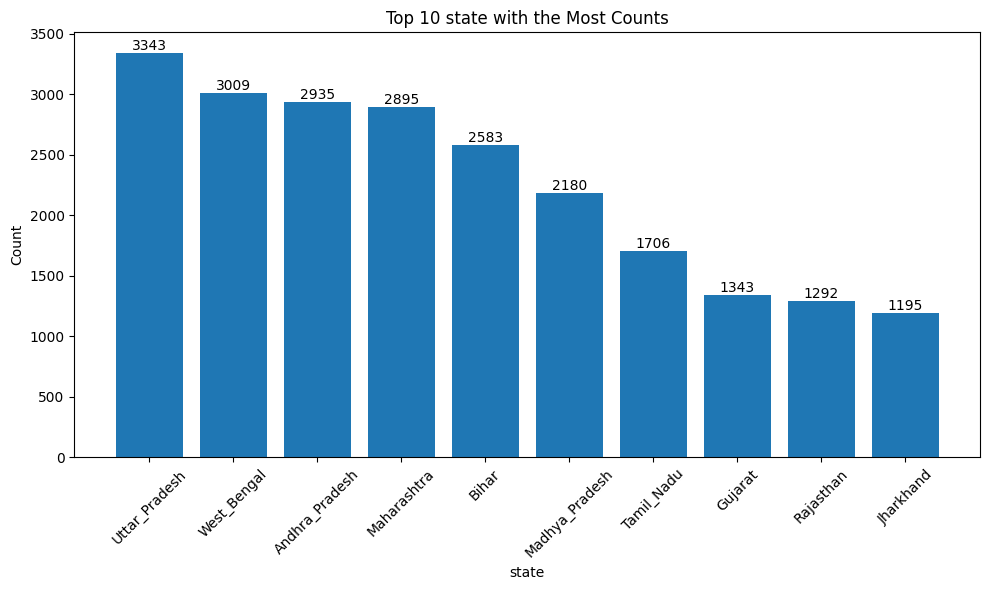

In [ ]:
plot_top_categories(rf1, 'state', top_n=10)

### Multivariate Analysis

<ipython-input-58-75d84056393c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

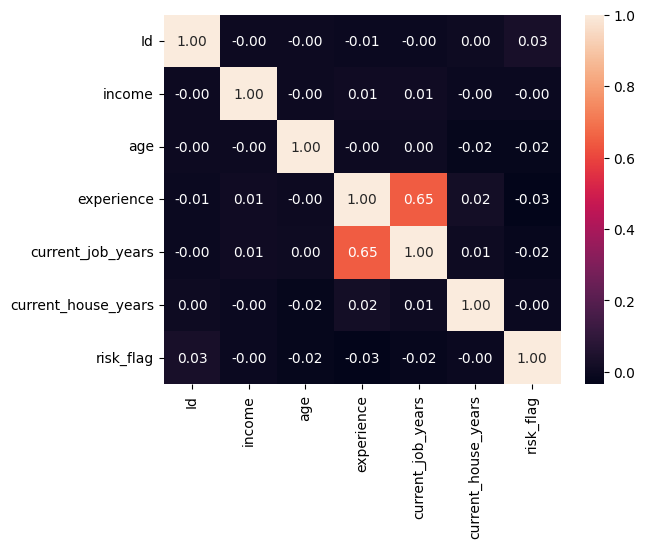

In [ ]:
# correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Based on the heatmap above, experience and current_job_years have a stronger correlation than the others, although the correlation is only 0.65, still < 0.7.

<Figure size 1000x1000 with 0 Axes>

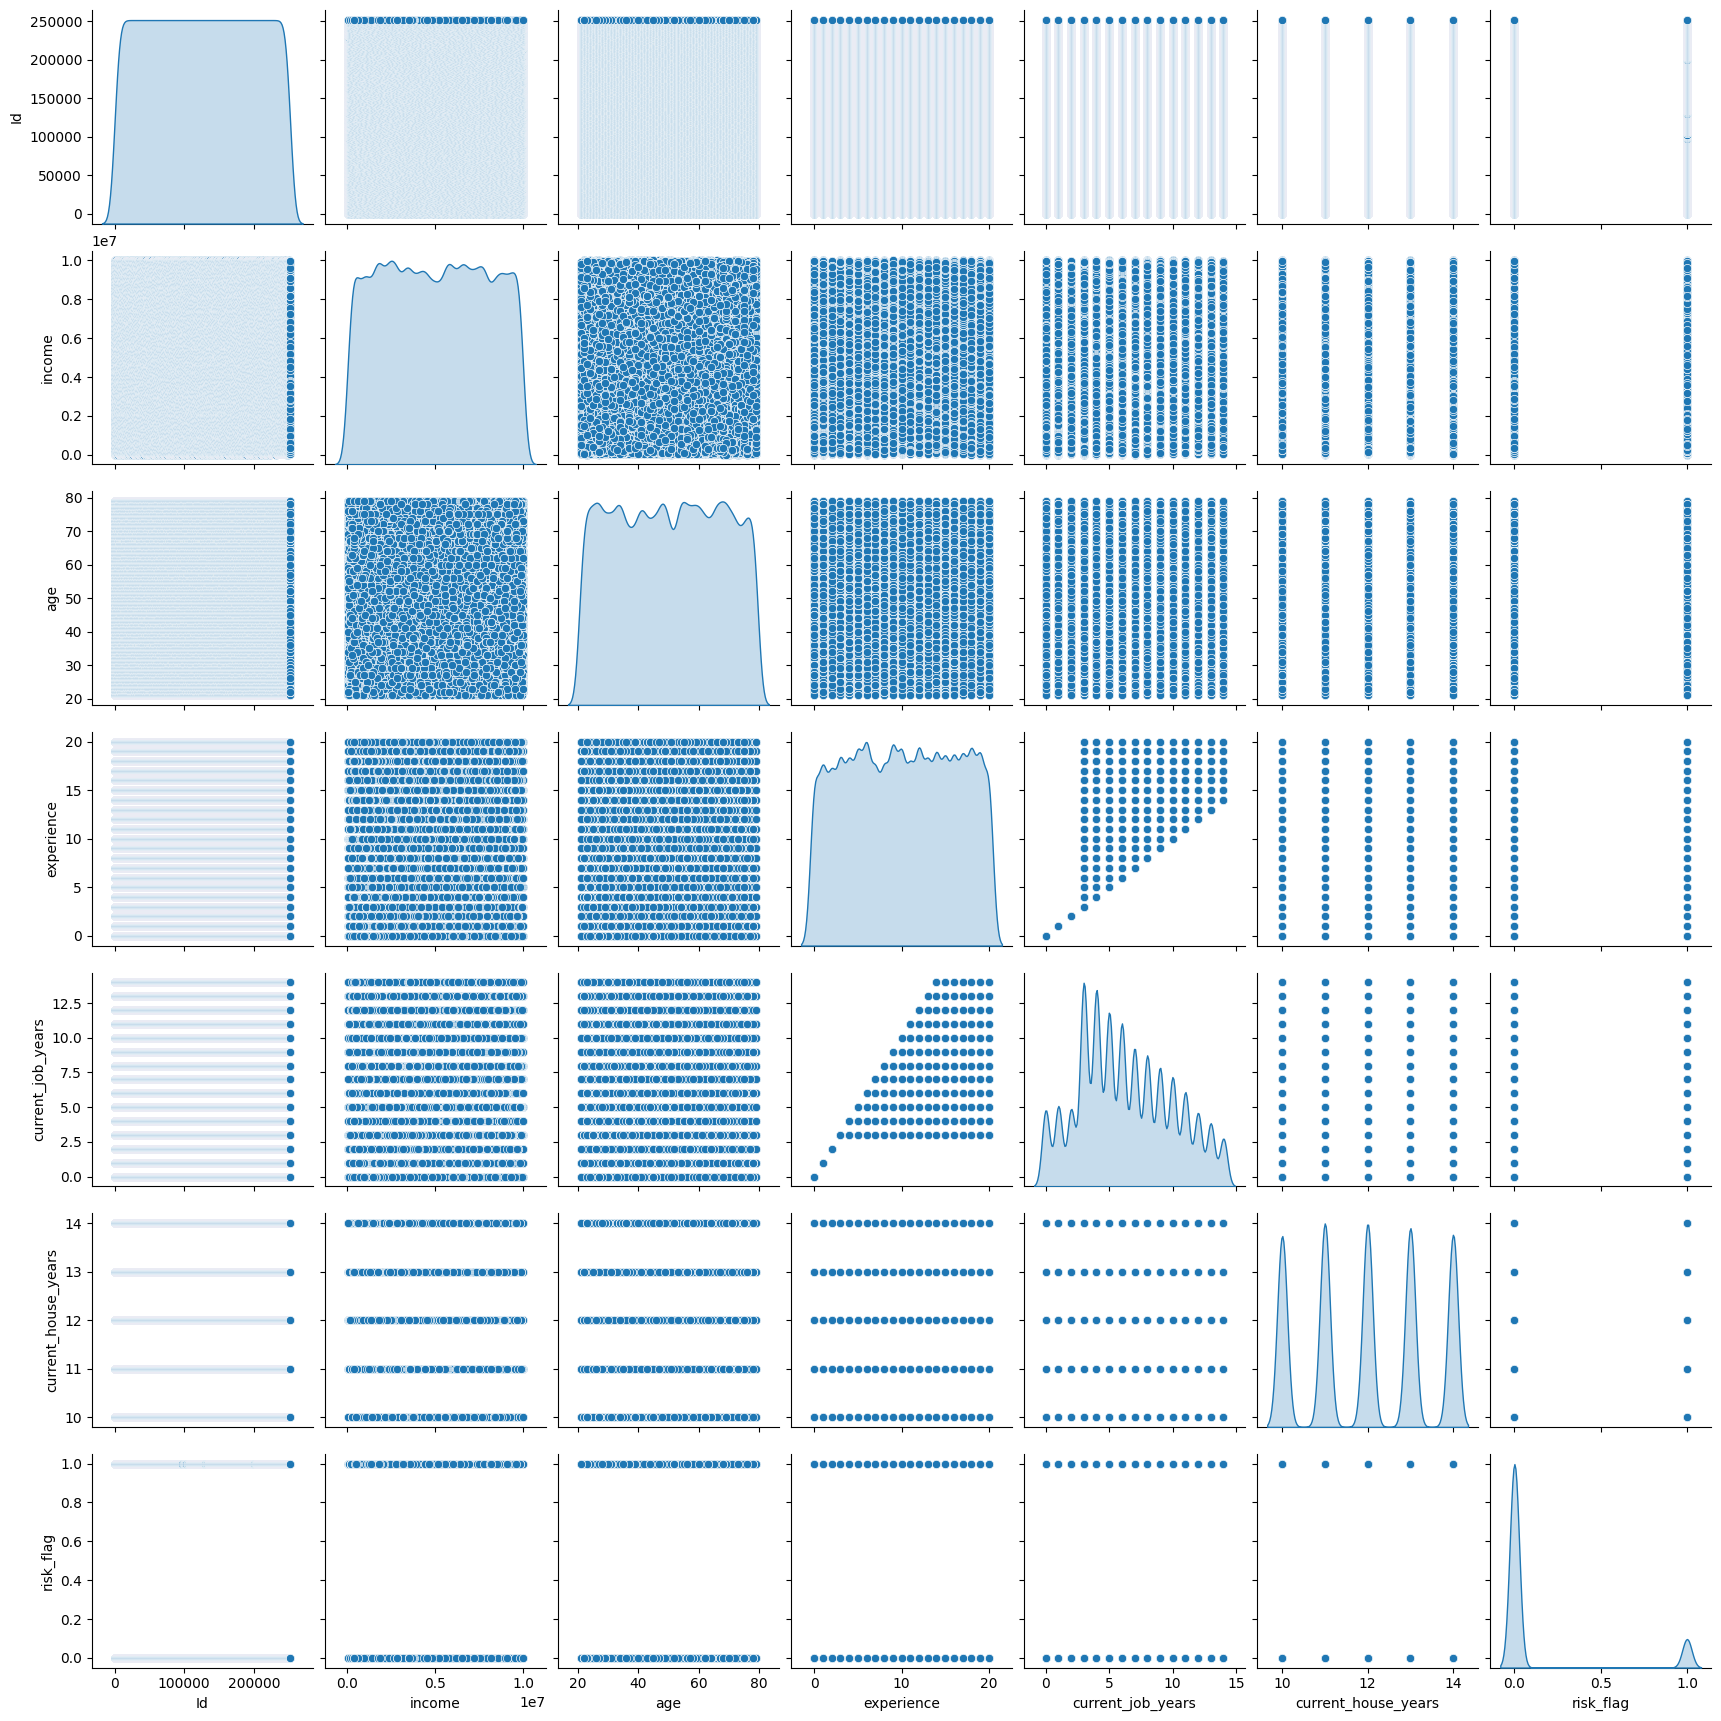

In [ ]:
# pairplot
plt.figure(figsize=(10, 10))
sns.pairplot(df, diag_kind='kde')
plt.show()

## Data Preprocessing

### One Hot Encode for variables married, car_ownership

The one hot encoding process can be done before splitting, because OHE depends on the number of categories. If we do an 80:20 split then the categories in a particular column will also have a ratio of 80:20. However, the disadvantage of this OHE is that if there are categories in a column variable that are very, very few (rare variables) then there is a possibility that the category is only in the train and not in the test, and vice versa.
For example: in the full dataset there are 10 rows with the number of categories A = 6, B = 3, C = 1. Then after splitting this variable C will only exist in the test or train, as a result it can be problematic if encoding is done.

In [ ]:
categorical_cols = ['married','car_ownership','house_ownership']
df.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
# will check the number of categories in the columns 'married','car_ownership','house_ownership'
for categories in categorical_cols:
    print(f"========== {categories}==========")
    print(df[categories].value_counts())

========== married==========
single     226272
married     25728
Name: married, dtype: int64
========== car_ownership==========
no     176000
yes     76000
Name: car_ownership, dtype: int64
========== house_ownership==========
rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64


From the results above, there are no variables in each column with very small category values and the smallest in the house_ownership column is 7184.

In [ ]:
# removes the first column of the dummy variable set
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df.head()

,Id,income,age,experience,profession,city,state,current_job_years,current_house_years,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented
0,1,1303835,23,3,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0,0,1
1,2,7574516,40,10,Software_Developer,Parbhani,Maharashtra,9,13,0,1,0,0,1
2,3,3991815,66,4,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,0,1
3,4,6256451,41,2,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,1,0,1
4,5,5768871,47,11,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,0,0,1


In [ ]:
df1 = df.copy(deep=True)
df1.head()

,Id,income,age,experience,profession,city,state,current_job_years,current_house_years,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented
0,1,1303835,23,3,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0,0,1
1,2,7574516,40,10,Software_Developer,Parbhani,Maharashtra,9,13,0,1,0,0,1
2,3,3991815,66,4,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,0,1
3,4,6256451,41,2,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,1,0,1
4,5,5768871,47,11,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,0,0,1


### Frequency Encoding for Variable profession, city, and state

In [ ]:
train, test = train_test_split(df1, test_size=0.2)

In [ ]:
#Function Frequent Encoding
def freq_encoding(df1_train, df1_test, col_to_count):

    # make a temporary copy of the original dataframes
    df1_train_temp = df1_train.copy()
    df1_test_temp = df1_test.copy()

    for col in col_to_count:
        # make the dictionary mapping label to counts
        X_frequency_map = df1_train_temp[col].value_counts().to_dict()

        # remap the labels to their counts
        df1_train_temp[col] = df1_train_temp[col].map(X_frequency_map)
        df1_test_temp[col] = df1_test_temp[col].map(X_frequency_map)

    return df1_train_temp, df1_test_temp

In [ ]:
col_use = ['profession', 'city', 'state']
train_freq, test_freq = freq_encoding(df1, test, col_use)

In [ ]:
df1.head()

,Id,income,age,experience,profession,city,state,current_job_years,current_house_years,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented
0,1,1303835,23,3,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,1,0,0,1
1,2,7574516,40,10,Software_Developer,Parbhani,Maharashtra,9,13,0,1,0,0,1
2,3,3991815,66,4,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,0,1
3,4,6256451,41,2,Software_Developer,Bhubaneswar,Odisha,2,12,1,1,1,0,1
4,5,5768871,47,11,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,1,0,0,1


In [ ]:
# check whether there are missing values
df1.isna().sum()

Id                        0
income                    0
age                       0
experience                0
profession                0
city                      0
state                     0
current_job_years         0
current_house_years       0
risk_flag                 0
married_single            0
car_ownership_yes         0
house_ownership_owned     0
house_ownership_rented    0
dtype: int64

### There is no missing value

In [ ]:
new_df1 = df1.copy()

In [ ]:
#drop some columns that is not needed
new_df1 = new_df1.drop(columns=['Id', 'profession', 'city', 'state'])

In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   income                  252000 non-null  int64
 1   age                     252000 non-null  int64
 2   experience              252000 non-null  int64
 3   current_job_years       252000 non-null  int64
 4   current_house_years     252000 non-null  int64
 5   risk_flag               252000 non-null  int64
 6   married_single          252000 non-null  uint8
 7   car_ownership_yes       252000 non-null  uint8
 8   house_ownership_owned   252000 non-null  uint8
 9   house_ownership_rented  252000 non-null  uint8
dtypes: int64(6), uint8(4)
memory usage: 12.5 MB


<Axes: >

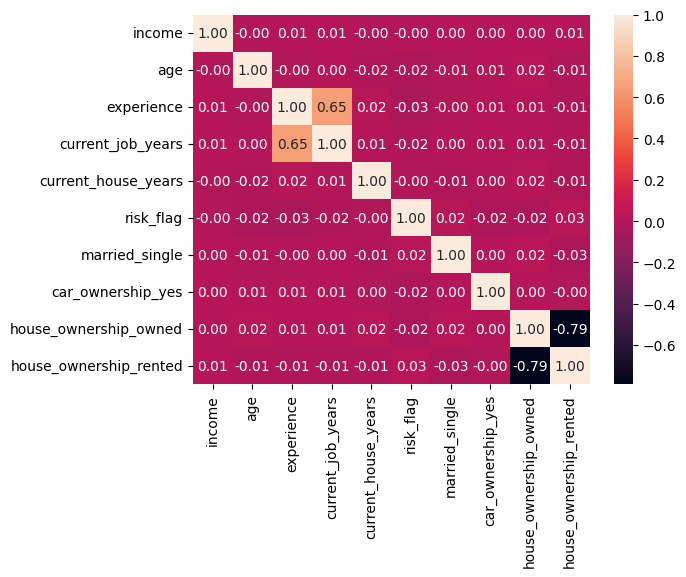

In [ ]:
#correlation heatmap
correlation = new_df1.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

### Scalling

#### We'll scale the variables which are not between 0 & 1. These include income, age, experience, current_job_years, and current_house_years.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

new_df1['scaled_income'] = scaler.fit_transform(new_df1['income'].values.reshape(-1,1))
new_df1['scaled_age'] = scaler.fit_transform(new_df1['age'].values.reshape(-1,1))
new_df1['scaled_experience'] = scaler.fit_transform(new_df1['experience'].values.reshape(-1,1))
new_df1['scaled_current_job_years'] = scaler.fit_transform(new_df1['current_job_years'].values.reshape(-1,1))
new_df1['scaled_current_house_years'] = scaler.fit_transform(new_df1['current_house_years'].values.reshape(-1,1))

new_df1.drop(['income', 'age', 'experience', 'current_job_years', 'current_house_years'], axis=1, inplace=True)

In [ ]:
# Checking head of our dataframe to see if variables are scaled or not.
new_df1.head()

,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented,scaled_income,scaled_age,scaled_experience,scaled_current_job_years,scaled_current_house_years
0,0,1,0,0,1,-1.283145,-1.579603,-1.180232,-0.914131,0.716356
1,0,1,0,0,1,0.895457,-0.583343,-0.014067,0.731036,0.716356
2,0,0,0,0,1,-0.349269,0.940347,-1.013637,-0.639936,-1.427981
3,1,1,1,0,1,0.437526,-0.524740,-1.346827,-1.188325,0.001577
4,1,1,0,0,1,0.268128,-0.173119,0.152528,-0.914131,1.431135


In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   risk_flag                   252000 non-null  int64  
 1   married_single              252000 non-null  uint8  
 2   car_ownership_yes           252000 non-null  uint8  
 3   house_ownership_owned       252000 non-null  uint8  
 4   house_ownership_rented      252000 non-null  uint8  
 5   scaled_income               252000 non-null  float64
 6   scaled_age                  252000 non-null  float64
 7   scaled_experience           252000 non-null  float64
 8   scaled_current_job_years    252000 non-null  float64
 9   scaled_current_house_years  252000 non-null  float64
dtypes: float64(5), int64(1), uint8(4)
memory usage: 12.5 MB


## Imbalance Data Checking

In [ ]:
train

,Id,income,age,experience,profession,city,state,current_job_years,current_house_years,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented
75566,75567,1010539,39,9,Secretary,Hyderabad,Telangana,4,13,0,1,0,0,1
205327,205328,4171960,73,16,Magistrate,Gorakhpur,Uttar_Pradesh,10,10,0,1,0,0,1
19261,19262,2065698,24,10,Mechanical_engineer,Chinsurah,West_Bengal,5,11,0,1,1,0,1
43236,43237,1197375,41,0,Microbiologist,Srinagar,Jammu_and_Kashmir,0,11,0,1,1,0,1
246374,246375,277549,37,17,Technology_specialist,Nashik,Maharashtra,14,10,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222084,222085,1325765,76,11,Chartered_Accountant,Nagaon,Assam,11,13,0,1,0,1,0
231018,231019,5968963,30,2,Artist,Farrukhabad,Uttar_Pradesh,2,13,0,1,0,0,1
186957,186958,7444228,43,16,Economist,Gangtok,Sikkim,3,13,0,1,0,0,1
25343,25344,5069758,50,19,Consultant,Baranagar,West_Bengal,13,11,0,1,1,0,1


In [ ]:
test

,Id,income,age,experience,profession,city,state,current_job_years,current_house_years,risk_flag,married_single,car_ownership_yes,house_ownership_owned,house_ownership_rented
112010,112011,6625727,65,3,Petroleum_Engineer,Shimoga,Karnataka,3,13,0,1,0,0,1
196319,196320,7979699,47,15,Computer_operator,Karnal,Haryana,10,13,0,0,1,0,1
109244,109245,8344425,79,17,Industrial_Engineer,Gopalpur,West_Bengal,3,13,0,1,0,0,1
94751,94752,6510098,42,11,Technician,Vadodara,Gujarat,11,11,0,1,0,0,1
163901,163902,394382,64,6,Police_officer,Bathinda,Punjab,6,13,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20429,20430,6572051,28,14,Drafter,Guntur[13],Andhra_Pradesh,9,11,0,1,0,0,1
214818,214819,4088166,40,7,Architect,Dhule,Maharashtra,7,14,1,1,0,0,1
148159,148160,5341055,57,8,Computer_hardware_engineer,Amroha,Uttar_Pradesh,7,13,0,1,1,0,1
10602,10603,1051358,43,14,Computer_hardware_engineer,Indore,Madhya_Pradesh,7,10,0,1,0,0,1


In [ ]:
#drop column 'id' on train_te and test_te data
traind = train.drop('Id', axis=1)
testd = test.drop('Id', axis=1)

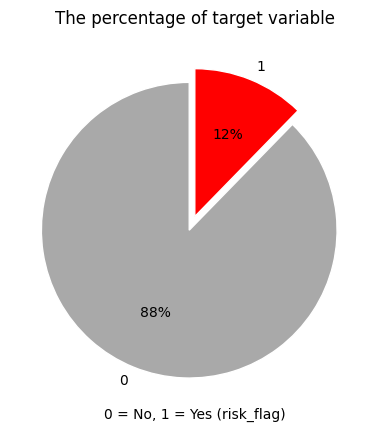

In [ ]:
#check percentage of target variable ['risk_flag']
perc = new_df1['risk_flag'].value_counts(normalize=True)*100

#plotting using pie chart
color = ['darkgrey','red']
plt.pie(perc.values, labels=perc.index, startangle=90, autopct='%1.0f%%', explode=(0.1,0), colors = color, wedgeprops = { 'linewidth' : 1 , 'edgecolor' : 'white'})
plt.title("The percentage of target variable")
plt.xlabel("0 = No, 1 = Yes (risk_flag)")

plt.show()

## Handling imbalance data

In [ ]:
df_balance = new_df1.copy()

In [ ]:
traind['risk_flag'].value_counts()

0    176813
1     24787
Name: risk_flag, dtype: int64

In [ ]:
traind['risk_flag'].value_counts(normalize=True)

0    0.877049
1    0.122951
Name: risk_flag, dtype: float64

In [ ]:
# feature
X = new_df1.drop(['risk_flag'],axis=1)
# target
y = new_df1['risk_flag']

In [ ]:
# X,y -> from new_df1 (full data)
# X_val -> original data -> data test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


### Balancing using SMOTE (Oversampling)

In [ ]:
# Handling imbalance only use train data
from imblearn import over_sampling

# Oversampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X_train, y_train)

After balancing the data, there is no need for splitting anymore, if splitting is done, it will result in overfitting because it uses data that has been handled imbalance.

In [ ]:
#new_df1['risk_flag'].value_counts()
y_over_smote.value_counts()

0    176857
1    176857
Name: risk_flag, dtype: int64

### now data is balance

# Modelling with Balance Data

### Logistic Regression

In [ ]:
# train
logreg = LogisticRegression(random_state=42)
logreg.fit(X_over_smote, y_over_smote)

LogisticRegression(random_state=42)

In [ ]:
# predict
y_pred_reg = logreg.predict(X_val)
y_pred_reg

array([0, 1, 1, ..., 1, 0, 1])

In [ ]:
# Evaluation
print('accuracy score LogReg', accuracy_score(y_val, y_pred_reg))
print('F1 score LogReg', f1_score(y_val, y_pred_reg))
print('recall score LogReg', recall_score(y_val, y_pred_reg))
print('precision score LogReg', precision_score(y_val, y_pred_reg))

accuracy score LogReg 0.503968253968254
F1 score LogReg 0.22254011692996642
recall score LogReg 0.5722053414361107
precision score LogReg 0.13813071844960043


### Desicion Tree

In [ ]:
# train
dt =DecisionTreeClassifier(random_state=42)
dt.fit(X_over_smote, y_over_smote)

DecisionTreeClassifier(random_state=42)

In [ ]:
# predict
y_pred_dt = dt.predict(X_val)
y_pred_dt

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# evaluation
print('accuracy score decision tree', accuracy_score(y_val, y_pred_dt))
print('F1 score decision tree', f1_score(y_val, y_pred_dt))
print('recall score decision tree', recall_score(y_val, y_pred_dt))
print('precision score decision tree', precision_score(y_val, y_pred_dt))

accuracy score decision tree 0.871904761904762
F1 score decision tree 0.6160342571666468
recall score decision tree 0.828242443627059
precision score decision tree 0.4903891676924534


### KNN

In [ ]:
# train
knn =KNeighborsClassifier()
knn.fit(X_over_smote, y_over_smote)

KNeighborsClassifier()

In [ ]:
# predict
y_pred_knn = knn.predict(X_val)
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# evaluation
print('accuracy score KNN', accuracy_score(y_val, y_pred_knn))
print('F1 score KNN', f1_score(y_val, y_pred_knn))
print('recall score KNN', recall_score(y_val, y_pred_knn))
print('precision score KNN', precision_score(y_val, y_pred_knn))

accuracy score KNN 0.861170634920635
F1 score KNN 0.4993918580525149
recall score KNN 0.558132096593635
precision score KNN 0.45183842568617294


### Random Forest

In [ ]:
# train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_smote, y_over_smote)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_val)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
# evaluation
print('accuracy score Random Forest', accuracy_score(y_val, y_pred_rf))
print('F1 score Random Forest', f1_score(y_val, y_pred_rf))
print('recall score Random Forest', recall_score(y_val, y_pred_rf))
print('precision score Random Forest', precision_score(y_val, y_pred_rf))

accuracy score Random Forest 0.8863690476190477
F1 score Random Forest 0.6326726957860304
recall score Random Forest 0.7887414041260196
precision score Random Forest 0.5281644891839794


### Gaussian Naive Bayes

In [ ]:
# train
gnb = GaussianNB()
gnb.fit(X_over_smote, y_over_smote)

GaussianNB()

In [ ]:
# predict
y_pred_gnb = gnb.predict(X_val)
y_pred_gnb

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# evaluation
print('accuracy score Gaussian Naive Bayes', accuracy_score(y_val, y_pred_gnb))
print('F1 score Gaussian Naive Bayes', f1_score(y_val, y_pred_gnb))
print('recall score Gaussian Naive Bayes', recall_score(y_val, y_pred_gnb))
print('precision score Gaussian Naive Bayes', precision_score(y_val, y_pred_gnb))

accuracy score Gaussian Naive Bayes 0.2664484126984127
F1 score Gaussian Naive Bayes 0.22474784541508525
recall score Gaussian Naive Bayes 0.8570286262593955
precision score Gaussian Naive Bayes 0.12933198185153008


### Gradient Boosted Tree

In [ ]:
# train
gbt = GradientBoostingClassifier()
gbt.fit(X_over_smote, y_over_smote)

GradientBoostingClassifier()

In [ ]:
# predict
y_pred_gbt = gbt.predict(X_val)
y_pred_gbt

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
# evaluation
print('accuracy score Gaussian Gradient Boosted Tree', accuracy_score(y_val, y_pred_gbt))
print('F1 score Gaussian Gradient Boosted Tree', f1_score(y_val, y_pred_gbt))
print('recall score Gaussian Gradient Boosted Trees', recall_score(y_val, y_pred_gbt))
print('precision score Gaussian Gradient Boosted Tree', precision_score(y_val, y_pred_gbt))

accuracy score Gaussian Gradient Boosted Tree 0.6444047619047619
F1 score Gaussian Gradient Boosted Tree 0.26422530585433945
recall score Gaussian Gradient Boosted Trees 0.5146329761714377
precision score Gaussian Gradient Boosted Tree 0.17774095553714445


## Compare the evaluation matrix for the training and the testing data.

In [ ]:
recall_score(y_val, rf.predict(X_val)), recall_score(y_over_smote, rf.predict(X_over_smote))

(0.7887414041260196, 0.9995759285750635)

In [ ]:
accuracy_score(y_val, rf.predict(X_val)), accuracy_score(y_over_smote, rf.predict(X_over_smote))

(0.8863690476190477, 0.9575702403636837)

In [ ]:
f1_score(y_val, rf.predict(X_val)), f1_score(y_over_smote, rf.predict(X_over_smote))

(0.6326726957860304, 0.9592806832857624)

In [ ]:
precision_score(y_val, rf.predict(X_val)), precision_score(y_over_smote, rf.predict(X_over_smote))

(0.5281644891839794, 0.9221083378973998)

#### Confusion Matrix analysis that should not be tolerated and can be tolerated in Case : Risk Flag
#### Because our dataset is balanced, we can use accuracy, besides that, see the business description below with consideration of the confusion matrix that refers to the existence of data (balance or not) and also to the existence of business, what can be tolerated
1. 1 -> Risk, 0 -> No Risk
2. Predicted Risk (1) turns out not (0) = False Positive -> Related to precision. We predict the customer is problematic (Risk) but in fact it is not -> this confusion matrix can still be tolerated, at least even though we predict the customer is problematic (risk) but he is smooth in paying (no risk).
3. Prediction of no risk (0) turns out to be risk (1) = False Negative -> Related to Recall. We predict that the customer is smooth in paying (no risk) but in fact he has a problem paying (risk) so this confusion matrix cannot be tolerated. Then we focus on recall.
#### In conclusion: we look at the considerations of accuracy and recall
1. From the results above, the accuracy is okay and the recall is not bad even though the difference between the train and test evaluations is around 21%. But it is a little understandable, because there could be feature engineering methods that perform better than the ones that have been applied above.

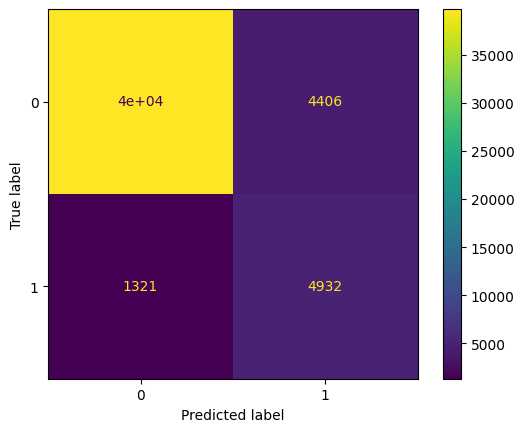

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Menampilkan matriks kebingungan
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) -> model diganti dengan rf
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()


# Dalex

#### Random Forest

In [ ]:
# make predictions on a test dataset using a trained random forest model
y_pred_rf = rf.predict(X_val)
y_pred_rf

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
y_pred_rf = pd.Series(y_pred_rf)
y_pred_rf.value_counts()

0    41062
1     9338
dtype: int64

In [ ]:
!pip install dalex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046000 sha256=ecdc29eee85585ee6f898eb23d10c69ca0be79b5757477dce6d5adea63229083
  Stored in directory: /root/.cache/pip/wheels/c8/45/19/f5810bf7c5ff9a476ebd89bb5b81a18ffcdf93931d17dbb0c1
Successfully built dalex


In [ ]:
# import dalex to explain complex model
import dalex as dx

In [ ]:
## initiate explainer for the best model -> pada dalex umumnya dibiarkan saja menggunakan data yang sebelum dilakukan balancing, supaya mengetahui informasi pada pure data. Kalau balancing informasinya sudah banyak berubah karena ada data yang ditambahkan (oversampling) atau dikurangi (undersampling)
var_exp = dx.Explainer(rf,X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 201600 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 201600 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f56085c2e60> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


  -> predicted values  : min = 0.0, mean = 0.186, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.99, mean = -0.063, max = 0.657
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
# visualize permutation feature importance for the best model
var_exp.model_parts().plot()

Based on the barplot above, `age`, `income`, `current job years`, and `experience` have a high effect on the `risk flag`. And `age` has the highest effect.

In [ ]:
# create partial dependence plot of LogReg model
var_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 9/9 [00:08<00:00,  1.01it/s]


Based on the graph above, it is difficult to interpret the numerical data because it has been scaled so it is difficult to determine which value affects the risk_flag.

# Bussiness Case

In [ ]:
!pip install scikit-plot

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

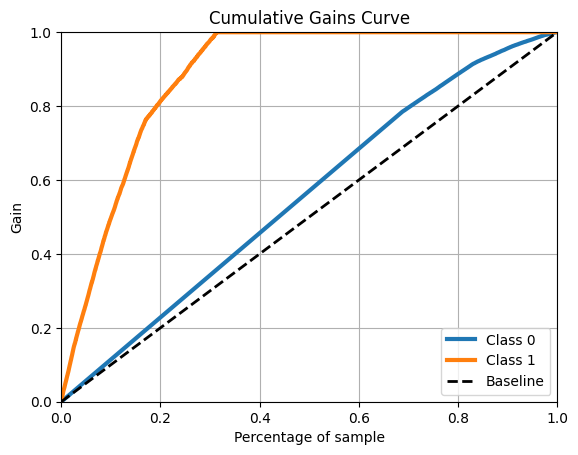

In [ ]:
# load scikitplot untuk visualisasi metrik

import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_val, rf.predict_proba(X_val))

### we can say that the results of the plot_cumulative_gain are good, for example, if we take a sampling of 0.2, then we have got in Class 1 is 0.8, which means 4x better performance than we do not use the model (baseline).

*Notes baseline != baseline model at the beginning of the discussion above.*

In [ ]:
group = df.groupby (by='risk_flag').size()
group

risk_flag
0    221004
1     30996
dtype: int64

In [ ]:
# frequency check
df['risk_flag'].value_counts()

0    221004
1     30996
Name: risk_flag, dtype: int64